<h1 style="color:#ff5500; font-family:Play; font-size:3em; margin:auto 32px;align:center">Part IV - Final Exploratory Data Analysis</h1>

---

This document is a part of the FACEIT Predictor Data Science Workflow.

In this notebook the exploratory data analysis is continued.

# Imports

In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualizations
import seaborn as sns
import matplotlib.pyplot as plt

# enable imports from parent directory
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent))

from src.utils.loaders import read_data
from src.visualization.defaults import set_visualization_defaults

In [4]:
set_visualization_defaults()

# Load Data

In [38]:
data = read_data("processed", read_all=False, no_batches=1)

In [39]:
data.head()

,_id,winner,match_mean_elo,5v5_free_queue,5v5_premium_queue,dif_mean_elo,dif_stddev_elo,dif_num_paid_memberships,dif_num_solo_players,dif_num_parties,...,dif_mean_dif_rounds_prev,dif_mean_dif_elo_prev,dif_mean_matches_afk,dif_num_played_togthr_prev,dif_winrate_togthr_prev,dif_mean_first_matches_on_day,dif_mean_matches_on_day,dif_mean_played_map_on_day,entity_dummies_hub,entity_dummies_matchmaking
0,1-0002441e-bec7-4746-9c01-81560aeb145f,0,1977.4,0,1,-8.8,-71.762256,0,2,1,...,-0.18,83.012,0.0,-0.16,-0.428571,0,0.6,0.6,0,1
1,1-00044d9e-77bd-4a14-bc36-ea864858ac9a,0,1796.1,1,0,129.4,454.523889,-2,1,1,...,0.56,417.192,0.0,-0.16,0.761905,0,0.2,0.0,0,1
2,1-00052bb7-c844-4004-b17d-868b6ed7a645,0,1920.0,1,0,-1.6,1.377856,0,0,0,...,0.64,-69.724,0.0,0.00,0.000000,1,0.2,0.2,0,1
3,1-00055c82-b90a-4395-b7c6-f032eb106230,0,1551.1,1,0,63.0,-21.022971,0,-1,-1,...,2.32,-176.240,0.0,-0.08,0.468571,0,-3.4,-2.0,0,1
4,1-00061954-f2ac-44c0-a7a8-ace5c2139e65,0,2639.5,0,1,72.6,16.935455,0,2,1,...,-0.86,-45.584,0.0,-0.28,0.428571,1,-1.4,0.0,0,1


In [40]:
data.groupby("winner").mean()

,match_mean_elo,5v5_free_queue,5v5_premium_queue,dif_mean_elo,dif_stddev_elo,dif_num_paid_memberships,dif_num_solo_players,dif_num_parties,dif_mean_matches,dif_mean_winrate,...,dif_mean_dif_rounds_prev,dif_mean_dif_elo_prev,dif_mean_matches_afk,dif_num_played_togthr_prev,dif_winrate_togthr_prev,dif_mean_first_matches_on_day,dif_mean_matches_on_day,dif_mean_played_map_on_day,entity_dummies_hub,entity_dummies_matchmaking
winner,,,,,,,,,,,,,,,,,,,,,
0,2049.126734,0.611055,0.310553,24.027538,26.044699,0.089447,-0.195980,-0.119598,49.916583,0.003837,...,0.010693,10.591920,0.0,0.019377,0.031675,-0.077387,0.061106,0.062915,0.069347,0.921608
1,2070.114712,0.628231,0.293241,-33.743936,-28.217438,-0.070577,0.024851,0.045726,-49.589662,-0.005585,...,-0.067605,-11.146418,0.0,-0.001948,-0.022786,0.083499,-0.000199,-0.043539,0.076541,0.921471


# Visualization

In [41]:
def comp_featured_based_on_winner(data, feature, num_bins=30, title=None):
    plt.figure(figsize=(12, 6))
    ax = sns.histplot(
        data,
        x=feature, hue="winner",
        hue_order=[0,1],
        multiple="fill",
        legend="A",
        bins=num_bins)
    
    ax.set_title(title)
    handles = ax.get_legend().legendHandles
    ax.legend(handles, ['A','B'], title="Winner team")

    avg_ft_values = data.groupby("winner").mean()[feature]
    avg_ft_values.index = ['A', 'B']
    for winner, mean_value in avg_ft_values.to_dict().items():
        print(f"Winner Team {winner}: Average {feature} is {mean_value}")
    return ax

Winner Team A: Average dif_mean_elo is 24.02753768844222
Winner Team B: Average dif_mean_elo is -33.74393638170974


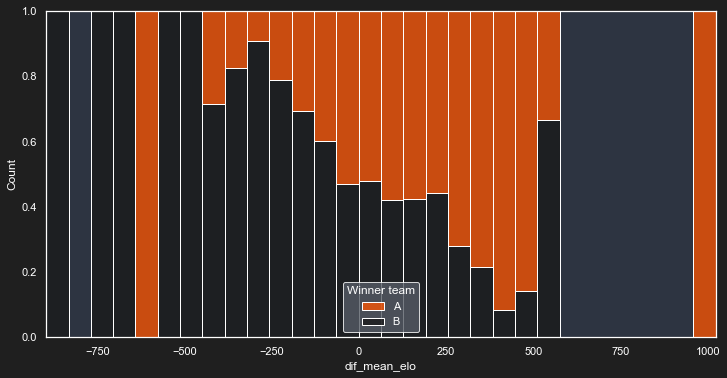

In [42]:
ax = comp_featured_based_on_winner(data, "dif_mean_elo");

In [29]:
data.groupby("winner").mean()["dif_mean_elo"].index = ['A', 'B']